# Introduction

This tutorial aims to explain you what word embeddings are, how to create the word embeddings and how to use the created embeddings to perform sentiment analysis on tweets. The tutorial uses keras, a neural network library built on TensorFlow, Theano, Microsoft Cognitive Toolkit and MXNet.

Word embeddings are numerical representations of text which would be able to closely represent the usage of a word in the text. If our training text (the text used to obtain the word embeddings) is large enough, we might get close to a generic representation of the words. 


A Word Embedding format generally tries to map a word using a dictionary to a vector. Each word is represented as a vector of real numbers forming the embedding.

### Different type of word embeddings:
#### Frequency based Embedding
Frequent based embeddings as the term suggests, represent the frequency of the words in the documents in the form of a vector.
Each vector has 'n' real numbers representing the frequency of the word in some form for 'n' documents.

Some of the popularly used frequency based embeddings:

1.Count Vector:
It is a simple counter on the given document. The word frequencies are taken into a vector in order to be used for various operations like genreating ranks, finding PMI, etc.

A popular way to do this would be to use count vectorizers.

2.TF-IDF Vector: tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

3.Co-Occurrence Vector: It provides information about the occurance of given two words in various documents. This is useful find relationsips among various words.

A co-occurrence matrix of size V X V. Now, for even a decent corpus V gets very large and difficult to handle. So generally, this architecture is never preferred in practice.

A co-occurrence matrix of size V X N where N is a subset of V and can be obtained by removing irrelevant words like stopwords etc. for example. This is still very large and presents computational difficulties.

#### Prediction based Embedding
A Prediciton based embedding usually represents the probablity of a word occuring given a preset of words. These embeddings are largely based on nueral nets and popularly used in generating embeddings like word2vec, GloVe.

1.Continuous Bag of words: We use CBOW to get the probability of a word given the context.

2.Skip – Gram model: Skip-gram is the reverse of CBOW, here we try to predict the context given a word.

## Word embedding use-cases:

Since words embeddings are representations of words in numerical forms, we can use these to find similarities among words, find the odd words, perform sentiment analysis, find similar users based on their review texts, and whole lot of other things.


## How to generate a word embedding:

There are many different forms of embeddings and many different ways to generate them, in this tutorial, we'll be using keras to generate the word embedding and we'll be using the same embedding to perform sentiment analysis on tweets.

### Installing the librarires:

#### Keras:

##### First, clone the library using git:

git clone https://github.com/keras-team/keras.git

##### Install the library using python:

cd keras
sudo python setup.py install

#### For Anaconda users on Windows:


conda install mingw libpython
pip install git+git://github.com/Theano/Theano.git
pip install git+git://github.com/fchollet/keras.git


referred from: https://stackoverflow.com/questions/34097988/how-do-i-install-keras-and-theano-in-anaconda-python-on-windows





## Let's get started on learning the word embeddings for tweets:

### First, let's download our data for the tweets:

In [127]:
import urllib.request
urllib.request.urlretrieve("https://dl.dropboxusercontent.com/s/jdu7t8gof9gdbir/data.zip?dl=0", "data.zip")

('data.zip', <http.client.HTTPMessage at 0x210653c1470>)

### extracting the data

In [130]:
import zipfile
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [118]:
#importing the datasets:
import pandas as pd
datafram = pd.read_csv("./data/train.csv", sep=",", encoding="latin-1", header = None)
datafram = datafram[[0, 5]]
datafram = datafram.dropna(axis = 0, how = "any")
datafram.columns = ['sentiment', 'text']

datafram1 = pd.read_csv("./data/test.csv", sep=",", encoding="latin-1", header = None)
datafram1 = datafram1[[0, 5]]
datafram1 = datafram1.dropna(axis = 0, how = "any")
datafram1.columns = ['sentiment', 'text']

print(datafram1.head())


list_of_tweets = [string for string in datafram["text"].head(n=5000)]
sentiments_train = [sentiment for sentiment in datafram["sentiment"].head(n=5000)]
list_of_tweets_test = [string for string in datafram1["text"].head(n=5000)]
sentiments_test = [sentiment for sentiment in datafram1["sentiment"].head(n=5000)]


   sentiment                                               text
0          1  @stellargirl I loooooooovvvvvveee my Kindle2. ...
1          1  Reading my kindle2...  Love it... Lee childs i...
2          1  Ok, first assesment of the #kindle2 ...it fuck...
3          1  @kenburbary You'll love your Kindle2. I've had...
4          1  @mikefish  Fair enough. But i have the Kindle2...


In [95]:
print(len(list_of_tweets_test))

498


#### let's consider the top(most frequent) 10000 words for our word embedding, the tokenizer get's the frequency of the words and puts in a matrix


In [125]:
from keras.preprocessing.text import Tokenizer

nb_words = 10000
tokenizer = Tokenizer(num_words=nb_words)
tokenizer.fit_on_texts(list_of_tweets)
sequences = tokenizer.texts_to_sequences(list_of_tweets)
sequences_test = tokenizer.texts_to_sequences(list_of_tweets_test)
sequences = tokenizer.texts_to_sequences(list_of_tweets)

for i,item in enumerate(sequences[:5]):
    print("The document", i+1,"would be encoded to look like this:")
    print(item)

The document 1 would be encoded to look like this:
[3691, 68, 241, 87, 3692, 390, 161, 4, 1243, 12, 2350, 46, 807, 3693, 11, 1099, 39, 2, 37, 9, 454]
The document 2 would be encoded to look like this:
[7, 421, 19, 122, 44, 455, 216, 533, 132, 3694, 9, 6, 253, 339, 74, 4, 1449, 121, 35, 340, 971]
The document 3 would be encoded to look like this:
[3695, 1, 3696, 230, 348, 10, 3, 1450, 872, 2, 1451, 1452, 3, 407, 32, 34, 11, 3697]
The document 4 would be encoded to look like this:
[5, 559, 534, 358, 1100, 6, 38, 65, 17, 1244]
The document 5 would be encoded to look like this:
[3698, 30, 40, 16, 3699, 21, 33, 20, 619, 69, 55, 1, 102, 213, 1, 44, 94, 12, 33, 126, 98]


Adding a padding to the tweets because not all tweets may of full length(each tweet can contain a max of 120 words(newer standard is 240 but our data contains a max of 120))

In [97]:
from keras.preprocessing.sequence import pad_sequences

max_len = 120
padded_sequences_train = pad_sequences(sequences, maxlen=max_len)
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_len)

let's build a model to obtain the embeddings and use it to classify the tweets
We'll be using LSTM to build the neural network

In [98]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()

### The entire set of words will be brought down to an emdedding of 25 dimensions
### this is our embedding layer which would create word embeddings required for our classification


In [99]:
model.add(Embedding(nb_words, 25))
model.add(LSTM(25))


### this would be our final activation layer which would classify the tweet's sentiment

In [100]:

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 25)          250000    
_________________________________________________________________
lstm_14 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 26        
Total params: 255,126
Trainable params: 255,126
Non-trainable params: 0
_________________________________________________________________
None


#### Now that we have defined our model, let's train and validate on the data we have

#### We'll be using an rmsprop optimizer which is a gradient descent optimization algorithm used to reach to an optimal solution

In [117]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

### spitting the data into train and test sets

In [103]:
from sklearn.model_selection import train_test_split

#let's fit our data and validate it
history = model.fit(padded_sequences_train, sentiments_train, epochs = 3,
                    validation_data=(padded_sequences_test,sentiments_test))



Train on 5000 samples, validate on 498 samples
Epoch 1/3
5000/5000 [==============================] - 28s 6ms/step - loss: 4.7220e-06 - acc: 1.0000 - val_loss: 5.2298 - val_acc: 0.6345
Epoch 2/3
5000/5000 [==============================] - 28s 6ms/step - loss: 2.2370e-07 - acc: 1.0000 - val_loss: 5.8905 - val_acc: 0.6345
Epoch 3/3
5000/5000 [==============================] - 26s 5ms/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 5.8905 - val_acc: 0.6345


### Now that we have trained our model, let's have a look as to how the embedding looks like:

In [104]:
from keras.models import Model
from keras.layers import Input
intermediate_layer_model = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
intermediate_output = intermediate_layer_model.predict(padded_sequences_test)

This is what the matrix of word generated by the embedding layer looks like. In our neural net, this is the output of the first layer. This matrix contains of vector representations of each word across different documents.

In [105]:
print(intermediate_output)

[[[ 0.04162078 -0.03348149  0.03786346 ... -0.04674438 -0.06014031
    0.00024746]
  [ 0.04162078 -0.03348149  0.03786346 ... -0.04674438 -0.06014031
    0.00024746]
  [ 0.04162078 -0.03348149  0.03786346 ... -0.04674438 -0.06014031
    0.00024746]
  ...
  [-0.00582225 -0.01026675  0.02723275 ... -0.0675716  -0.03286002
   -0.01973963]
  [-0.00969476 -0.04095811 -0.00980223 ... -0.02640022 -0.01141983
   -0.04310979]
  [ 0.03945119 -0.01108055  0.0396351  ... -0.02955022  0.03476034
    0.01253241]]

 [[ 0.04162078 -0.03348149  0.03786346 ... -0.04674438 -0.06014031
    0.00024746]
  [ 0.04162078 -0.03348149  0.03786346 ... -0.04674438 -0.06014031
    0.00024746]
  [ 0.04162078 -0.03348149  0.03786346 ... -0.04674438 -0.06014031
    0.00024746]
  ...
  [-0.00194294  0.00193267  0.01482169 ... -0.02822047 -0.05402488
   -0.05006673]
  [-0.00144253 -0.06722535  0.05305618 ... -0.06403372 -0.04306626
    0.01246735]
  [ 0.04671446  0.01487343  0.03778696 ... -0.01028239  0.02608524
    0.

Now, let's bring down the word representaions of all the words in the first document to a 2-D to help us visualize how they are spread across.

We'll be using TSNE to perform this dimensionality reduction.

In [106]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=45,angle=0.99,init = 'pca',learning_rate=500.0)
tsne_sample = tsne.fit_transform(intermediate_output[1])

[t-SNE] Computing 119 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: -42.567875
[t-SNE] Error after 1000 iterations: -11.514710


Now, let's plot the spread of these words, which would result in something looking like this:

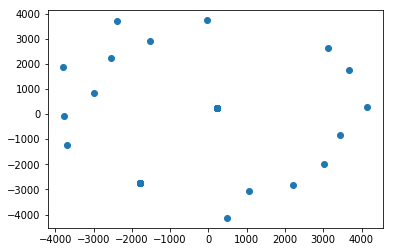

In [107]:
import matplotlib.pyplot as plt
plt.scatter(tsne_sample[:, 0], tsne_sample[:, 1])
plt.show()

Using a pre-trained model to train your neural net:

You can use a pre-trained word embedding model like word2vec or GloVe to understand how words are being used and feed this as an input to your model.

Following is a demonstration as to how we can do that.


### let's download the pre-trianed model for tweets from GloVe, the following file has a size of around 1.3GB, so it might take a while to download

In [ ]:
import urllib.request
urllib.request.urlretrieve("http://nlp.stanford.edu/data/glove.twitter.27B.zip", "file.zip")

Now that the files have been downloaded, let's unzip them into the folder and load the unzipped files.

In [109]:
import zipfile
with zipfile.ZipFile("file.zip","r") as zip_ref:
    zip_ref.extractall(".")

Loading the 25 dimensional vector GloVe

In [110]:
from numpy import asarray
import numpy as np
embeddings_index = dict()
f = open('./glove.twitter.27B.25d.txt', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1193514 word vectors.


### create a weight matrix for words in training docs

In [111]:

vocab_size = 1000000
embedding_matrix = np.zeros((vocab_size, 25))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [112]:
embedding_layer_2 = Embedding(vocab_size, 25, weights=[embedding_matrix], trainable=False)
model = Sequential()
model.add(embedding_layer_2)
model.add(LSTM(25))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 25)          25000000  
_________________________________________________________________
lstm_15 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 26        
Total params: 25,005,126
Trainable params: 5,126
Non-trainable params: 25,000,000
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

### spitting the data into train and test sets

In [113]:
from sklearn.model_selection import train_test_split

#let's fit our data and validate it
history = model.fit(padded_sequences_train, sentiments_train, epochs = 3,
                    validation_data=(padded_sequences_test,sentiments_test))

Train on 5000 samples, validate on 498 samples
Epoch 1/3
5000/5000 [==============================] - 26s 5ms/step - loss: 0.0465 - acc: 0.9996 - val_loss: 2.9684 - val_acc: 0.6345
Epoch 2/3
5000/5000 [==============================] - 25s 5ms/step - loss: 8.2583e-05 - acc: 1.0000 - val_loss: 4.1717 - val_acc: 0.6345
Epoch 3/3
5000/5000 [==============================] - 24s 5ms/step - loss: 3.4631e-06 - acc: 1.0000 - val_loss: 5.2728 - val_acc: 0.6345


In [114]:
from keras.models import Model
from keras.layers import Input
intermediate_layer_model = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
intermediate_output = intermediate_layer_model.predict(padded_sequences_test)

In [115]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=45,angle=0.99,init = 'pca',learning_rate=500.0)
tsne_sample = tsne.fit_transform(intermediate_output[1])

[t-SNE] Computing 119 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: -67.600555
[t-SNE] Error after 1000 iterations: -15.036423


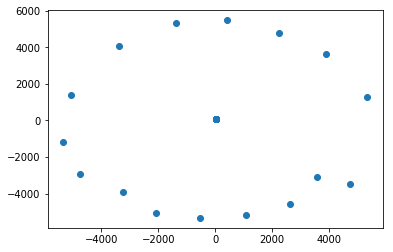

In [116]:
import matplotlib.pyplot as plt
plt.scatter(tsne_sample[:, 0], tsne_sample[:, 1])
plt.show()

References:
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

https://nlp.stanford.edu/projects/glove/

https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

https://www.quora.com/How-is-GloVe-different-from-word2vec

https://en.wikipedia.org/wiki/Word_embedding

https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

https://machinelearningmastery.com/what-are-word-embeddings/

https://www.tensorflow.org/tutorials/word2vec

https://en.wikipedia.org/wiki/Tf%E2%80%93idf